In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from datetime import datetime as dt
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [165]:
his = pd.read_csv("his2.csv")

In [3]:
his.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [143]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [161]:
len(his["card_id"].unique())

325540

In [144]:
his2 = reduce_mem_usage(his, verbose=True)

Mem. usage decreased to 1998.99 Mb (47.1% reduction)


In [7]:
his.dtypes

authorized_flag          object
card_id                  object
city_id                   int32
category_1               object
installments              int32
category_3               object
merchant_category_id      int32
merchant_id              object
month_lag                 int32
purchase_amount         float32
purchase_date            object
category_2              float32
state_id                  int32
subsector_id              int32
dtype: object

In [5]:
his = his.astype({'city_id': 'int32',"installments":'int32', "merchant_category_id":'int32', "purchase_amount": 'float32', 
                  "category_2": 'float32', "state_id":'int32', "subsector_id":'int32', 'month_lag': 'int32',
                  'state_id': 'int32','subsector_id': 'int32'}) 

In [8]:
def todt(data, dformat):
    l = []
    for i in data:
        a = dt.strptime(i, dformat)
        l.append(a)
        
    return l

In [9]:
temp = todt(his["purchase_date"], "%Y-%m-%d %H:%M:%S")
his["purchase_date"] = temp

In [11]:
his.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [12]:
#datetime 데이터로 변경
his['purchase_date'] = pd.to_datetime(his['purchase_date'])
#연월일시분초 분리
his['purchase_year'] = his['purchase_date'].dt.year
his['purchase_month'] =his['purchase_date'].dt.month
his['purchase_day'] = his['purchase_date'].dt.day
his['purchase_hour'] = his['purchase_date'].dt.hour
his['purchase_minute'] = his['purchase_date'].dt.minute
his['purchase_second'] = his['purchase_date'].dt.second

his.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_minute,purchase_second
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,2017,6,25,15,33,7
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,2017,7,15,12,10,45
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,2017,8,9,22,4,29
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,2017,9,2,10,6,26
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,2017,3,10,1,14,19


In [145]:
his2.to_csv("his3.csv", encoding = "utf-8")

In [146]:
gc.collect()

0

In [69]:
his.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_minute,purchase_second
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,6.134567e-02,1.777006e+00,1.056679e+01,2.684839e+01,2.017182e+03,6.512375e+00,1.580065e+01,1.409413e+01,2.866558e+01,2.866739e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123521e+03,1.482217e+00,6.366927e+00,9.692793e+00,3.854432e-01,3.874284e+00,8.668347e+00,5.465990e+00,1.775287e+01,1.775342e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00,2.017000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01,2.017000e+03,2.000000e+00,8.000000e+00,1.100000e+01,1.300000e+01,1.300000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01,2.017000e+03,7.000000e+00,1.600000e+01,1.500000e+01,2.900000e+01,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01,2.017000e+03,1.000000e+01,2.300000e+01,1.800000e+01,4.400000e+01,4.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01,2.018000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


In [47]:
cate2 =list(his["category_2"].unique())

In [32]:
city =list(his["city_id"].unique())

In [75]:
cate2 = his["category_2"]
temp = []
for i in cate2:
    if np.isnan(i):
        temp.append(-99)
    else:
        temp.append(i)

In [77]:
his["cate2_fillna"] = temp

In [62]:
def categorize(df, inputcol, outputcol):
    mcl = df[inputcol].unique()
    dic2 = {}
    for i in mcl:
        dic2[i] = len(df[df[inputcol]==i].groupby(outputcol).size())
    return dic2
#     if dic2.values()

In [78]:
categorize(his, "state_id", "cate2_fillna")

{16: 1,
 9: 1,
 -1: 1,
 11: 1,
 15: 1,
 17: 1,
 5: 1,
 24: 1,
 19: 1,
 23: 1,
 3: 1,
 8: 1,
 18: 1,
 7: 1,
 4: 1,
 22: 1,
 13: 1,
 1: 1,
 10: 1,
 21: 1,
 20: 1,
 14: 1,
 2: 1,
 12: 1,
 6: 1}

In [85]:
def categorize2(df, inputcol, outputcol):
    dic1 ={}

    for i in range(len(df)):
        key = df[outputcol][i]
        val = df[inputcol][i]
        if key in dic1:
            dic1[key].add(val)
        else: 
            dic1[key] =set([val])
            
    return dic1

In [162]:
categorize2(his, "state_id", "cate2_fillna")

{1.0: {9, 12, 15, 16},
 -99.0: {-1},
 3.0: {1, 2, 3, 7, 8, 11, 17, 19},
 5.0: {5, 20, 21},
 2.0: {6, 10, 18, 23, 24},
 4.0: {4, 13, 14, 22}}

In [55]:
if all(dic2.values()) ==1:
    print("true")

true


In [56]:
dic2.values()

dict_values([1, 3, 1, 1, 1, 1, 9, 2, 1, 2, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 3, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## month lag

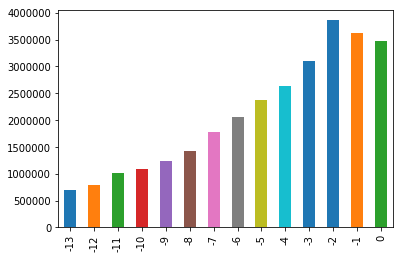

In [113]:
ml = his["month_lag"].value_counts()
ml = ml.sort_index()
ml.plot(kind = "bar")

## purchase date

In [100]:
min(his["purchase_date"]), max(his["purchase_date"])

(Timestamp('2017-01-01 00:00:08'), Timestamp('2018-02-28 23:59:51'))

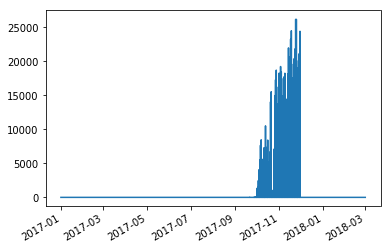

In [102]:
his["purchase_date"].value_counts().plot()

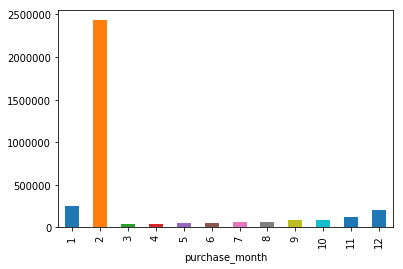

In [127]:
his_monthlag_zero= his[his["month_lag"] == 0]
his_monthlag_zero.groupby("purchase_month").size().plot(kind = "bar")

In [141]:
his_monthlag_zero.groupby(["purchase_year","purchase_month"]).size()

purchase_year  purchase_month
2017           2                    3242
               3                   36822
               4                   40939
               5                   43101
               6                   49514
               7                   59202
               8                   66144
               9                   80317
               10                  82104
               11                 118028
               12                 206195
2018           1                  254374
               2                 2430964
dtype: int64

## authorized flag

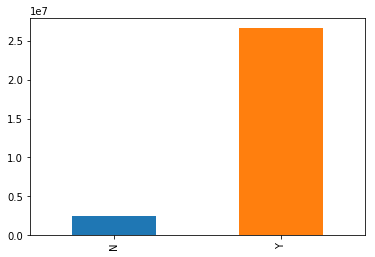

In [116]:
auth = his["authorized_flag"].value_counts()
auth = auth.sort_index()
auth.plot(kind = "bar")

## category3

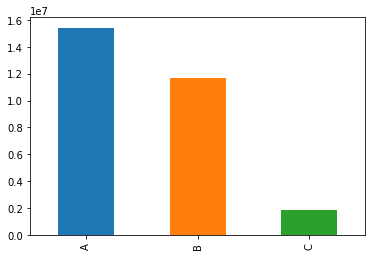

In [147]:
cat3 = his["category_3"].value_counts()
cat3 = cat3.sort_index()
cat3.plot(kind = "bar")

## installment

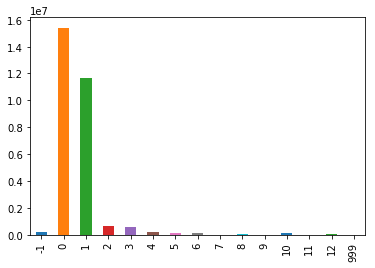

In [148]:
install = his["installments"].value_counts()
install = install.sort_index()
install.plot(kind = "bar")

## category 1

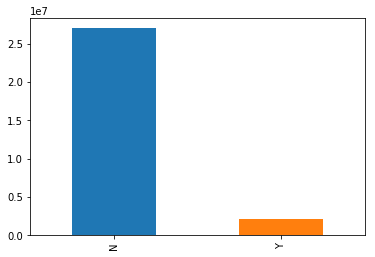

In [149]:
cat1 = his["category_1"].value_counts()
cat1 = cat1.sort_index()
cat1.plot(kind = "bar")

## subsector_id

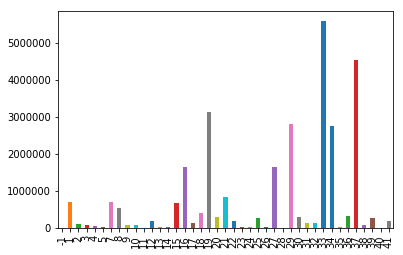

In [150]:
sub_id = his["subsector_id"].value_counts()
sub_id = sub_id.sort_index()
sub_id.plot(kind = "bar")

## citi_id, state_id, category2

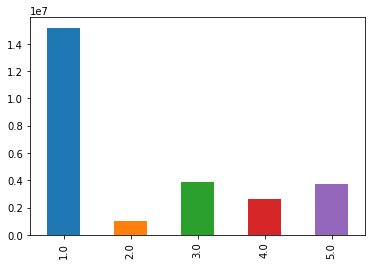

In [152]:
cat2 = his["category_2"].value_counts()
cat2 = cat2.sort_index()
cat2.plot(kind = "bar")

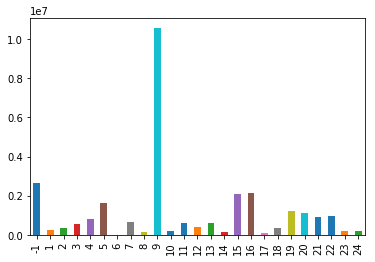

In [153]:
state = his["state_id"].value_counts()
state = state.sort_index()
state.plot(kind = "bar")

In [158]:
city_id = his["city_id"].value_counts()
city_id = city_id.sort_index()
city_id

-1      2478624
 1       108519
 2        17171
 3        42665
 4       212403
 6        24220
 7        22477
 8        89353
 9        21053
 10       33395
 11       92785
 12       96647
 13       32701
 14       64610
 16       11747
 17      971714
 18        9565
 19     1151077
 20      207650
 21      149278
 22       23707
 23       22236
 24       74184
 25      356757
 26        9845
 28       23586
 29       34057
 30       83598
 32        8382
 33       67797
         ...   
 314      99370
 315       3845
 316        149
 318      27786
 319       1645
 320      65485
 321       9808
 322     153926
 323      37486
 325      29257
 326       7912
 327       7499
 328      22886
 329      35343
 330      34942
 331     714414
 333     561144
 334      70606
 335      12474
 336       9022
 337      18568
 338      14757
 339      56509
 340     124669
 341      31500
 342      17622
 343      12113
 344     177694
 345      10424
 347      43617
Name: city_id, Length: 3

In [157]:
city_id.sort_values()

 185         45
 316        149
 273        620
 92         758
 319       1645
 315       3845
 207       3905
 263       4003
 178       4430
 89        4760
 215       4791
 205       5385
 122       5458
 130       5657
 221       6096
 306       6128
 204       6745
 71        6781
 254       7143
 227       7233
 237       7285
 84        7367
 112       7461
 327       7499
 293       7804
 326       7912
 235       7918
 54        8201
 81        8278
 32        8382
         ...   
 161     168745
 344     177694
 140     190359
 291     199983
 20      207650
 53      209668
 107     210182
 4       212403
 76      216048
 286     231877
 277     247294
 213     248371
 160     317617
 117     322414
 233     355108
 25      356757
 149     359540
 57      382232
 212     406196
 87      444940
 333     561144
 137     603023
 88      659328
 143     668769
 331     714414
 17      971714
 158    1113013
 19     1151077
-1      2478624
 69     4835441
Name: city_id, Length: 3

In [ ]:
corr_his = his2.corr()
sns.heatmap(corr_his2)
plt.show()